## Sex chromosomes in diptera

This is an Jupyter Notebook with R. When you execute code within the notebook, the results appear beneath the code. First we load and open the data file for each species using the following command (press the "play" button to execute the code). To run the data for a different species simply change the species name and rerun the code.

In [1]:
species_name <- "D.miranda"
species <- read.table(paste0("data/", species_name, "1.csv"), header = T, sep = ',', check.names = F)

summary(species) # shows sumarry of the table

 \357..Scaffold          Fper            Fcov            Mper       
 Length:3637        Min.   :  0.0   Min.   : 1.80   Min.   :  5.40  
 Class :character   1st Qu.: 95.0   1st Qu.: 5.80   1st Qu.: 96.00  
 Mode  :character   Median : 98.0   Median : 6.50   Median : 98.00  
                    Mean   : 95.4   Mean   : 6.53   Mean   : 96.62  
                    3rd Qu.: 99.0   3rd Qu.: 7.00   3rd Qu.: 99.00  
                    Max.   :100.0   Max.   :33.00   Max.   :100.00  
                                    NA's   :2                       
      Mcov           chrom                log2        
 Min.   : 1.200   Length:3637        Min.   :-1.4594  
 1st Qu.: 5.600   Class :character   1st Qu.:-0.2022  
 Median : 8.000   Mode  :character   Median : 0.4206  
 Mean   : 8.332                      Mean   : 0.2885  
 3rd Qu.:10.000                      3rd Qu.: 0.6114  
 Max.   :82.000                      Max.   : 3.5670  
                                     NA's   :2        

These dataframes contains the male and female coverage values for each scaffold larger than 1000bps in the genome of each species studied, as well as the chromosome of its putative homolog in _D. melanogaster_. We would like to normalize male (`Mcov`) and femlae (`Fcov`) coverage, and then calucale a log ratio of them

In [2]:
species$normalized_male <- species$Mcov / median(species$Mcov, na.rm = T) # male covrage normalized by median
species$normalized_female <- species$Fcov / median(species$Fcov, na.rm = T) # female covrage normalized by median

# calculate normalized coverage ratio
species$log2_ratio <- log2(species$normalized_male / species$normalized_female)


Both coverages are normalised, which means that if a chromosome is diploid in both males and females, the ratio will be around 0 (log2 (1 / 1)), if the Muller element if haploid in males, and diploid in females, the log2 of the normalized coverage ratio will be approximatelly -1 (log2 (0.5 / 1)). Next, lets plot this ratio for each chromosomal arm. The code below  plots the ratio against the chromosome name, names the X and Y axes and give the plot a title.

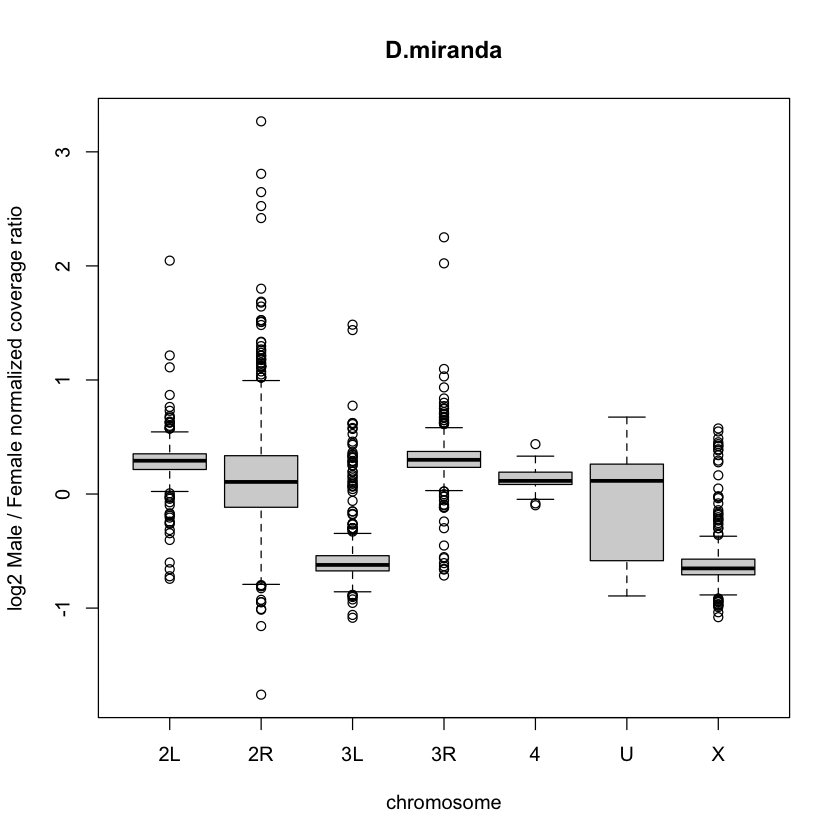

In [3]:
boxplot(log2_ratio ~ chrom, data = species, xlab="chromosome", ylab="log2 Male / Female normalized coverage ratio",
     main=species_name)

Now, save the figure and return to the beginning and change the species name to a different species. Or modify the R code, so you can analyse all the species.

### A few tricks

1. You can get all the species in this notebook using R command `dir`

```
dir('data')
```

2. You can load more than one file into R at the same time. There many ways to do that, one of them could be using function `lapply` to get a list of data.frames with all the data. `lapply` exectutes a function

```
vector_of_sp_file_names <- dir('data', full.names = T)
coverage_list_diptera <- lapply(vector_of_sp_file_names, read.table, header = T, sep = ',', check.names = F)
``` 

`coverage_list_diptera[[1]]` will be the `data.frame` corresponding to the first file - `vector_of_sp_file_names[1]`, etc.

3. You can add colours to the box plots, so they are easier to read. The colors are added by argument `, col = c('blue', 'darkgreen', 'yellow', 'red', 'brown', 'grey', 'purple')` to the plotting function.